In [1]:
import nltk

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/drive/MyDrive/NLP/ME/spam.csv",encoding='latin-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df=df.iloc[:,:2]

In [6]:
df=df.rename(columns={"v1":"label","v2":"text"})

In [17]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [19]:
df.shape

(5572, 2)

In [20]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

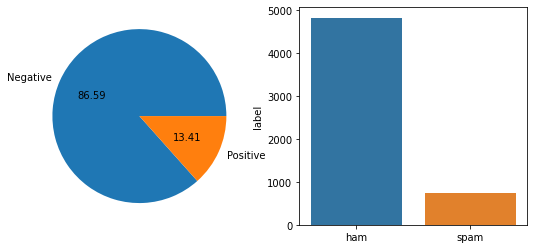

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.pie(df['label'].value_counts(),labels=['Negative','Positive'],autopct="%0.2f")
plt.subplot(1,2,2)
sns.barplot(x=df['label'].value_counts().index,y=df['label'].value_counts(),data=df)
plt.show()

In [9]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [10]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
df['text'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: text, dtype: object

In [31]:
stemmer = PorterStemmer()

In [32]:
nltk.download('stopwords')
for i in range(len(df["text"])):
    words = nltk.word_tokenize(df['text'][i])
    words = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    df['text'][i] = ' '.join(words) 
    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
df['text'].head()

0    go jurong point , crazi .. avail bugi n great ...
1                        ok lar ... joke wif u oni ...
2    free entri 2 wkli comp win fa cup final tkt 21...
3          u dun say earli hor ... u c alreadi say ...
4         nah i n't think goe usf , live around though
Name: text, dtype: object

In [34]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [35]:
# Implementing Label Encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['label']= label_encoder.fit_transform(df['label'])
df['label'].unique()

array([0, 1])

In [36]:
df.head()

,label,text
0,0,"go jurong point , crazi .. avail bugi n great ..."
1,0,ok lar ... joke wif u oni ...
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor ... u c alreadi say ...
4,0,"nah i n't think goe usf , live around though"


In [41]:
df

,label,text
0,0,"go jurong point , crazi .. avail bugi n great ..."
1,0,ok lar ... joke wif u oni ...
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor ... u c alreadi say ...
4,0,"nah i n't think goe usf , live around though"
...,...,...
5567,1,thi 2nd time tri 2 contact u. u å£750 pound pr...
5568,0,will ì_ b go esplanad fr home ?
5569,0,"piti , * mood . so ... suggest ?"
5570,0,the guy bitch i act like 'd interest buy somet...



1.   Remove Web Links 
2.   Remove Numbers
3.   Remove Emails



In [42]:
def remove_website_links(text):
    no_website_links = text.replace(r"http\S+", "")
    return no_website_links

def remove_numbers(text):
    removed_numbers = text.replace(r'\d+','')
    return removed_numbers

def remove_emails(text):
    no_emails = text.replace(r"\S*@\S*\s?",'')
    return no_emails

In [43]:
df['text'] = df['text'].apply(remove_website_links)
df['text'] = df['text'].apply(remove_numbers)
df['text'] = df['text'].apply(remove_emails)

In [44]:
#Text Vecorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [45]:
X = tfidf.fit_transform(df['text']).toarray()
y = df['label'].values

In [50]:
X.shape

(5572, 3000)

In [51]:
y.shape

(5572,)

Train-Test-Split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [54]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

In [56]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy Score -",accuracy_score(y_test,y_pred1))
print("Precision Score -",precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

Accuracy Score - 0.875
Precision Score - 0.5121293800539084
[[1273  181]
 [  28  190]]


In [57]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy Score -",accuracy_score(y_test,y_pred2))
print("Precision Score -",precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

Accuracy Score - 0.9796650717703349
Precision Score - 0.9946236559139785
[[1453    1]
 [  33  185]]


In [58]:
classifiers={"svc":SVC(kernel='sigmoid', gamma=1.0),
            "knc": KNeighborsClassifier(),
             "mnb" : MultinomialNB(),
             "dtc" : DecisionTreeClassifier(max_depth=5),
             "lr" : LogisticRegression(solver='liblinear', penalty='l1'),
             "rfc" : RandomForestClassifier(n_estimators=50, random_state=2),
             "adb" : AdaBoostClassifier(n_estimators=50, random_state=2),
             "xgb" : XGBClassifier(n_estimators=50,random_state=2),
             "gbc" : GradientBoostingClassifier(n_estimators=50,random_state=2)
            }

In [59]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    train_accuracy = clf.score(X_train,y_train)
    
    return accuracy,precision,train_accuracy

In [60]:
svc=SVC(kernel='sigmoid', gamma=1.0)
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9820574162679426, 0.9947368421052631, 0.9905128205128205)

In [61]:
accuracy_scores = []
precision_scores = []
train_accuracy_score=[]

for name,clf in classifiers.items():
    
    current_accuracy,current_precision,current_train_score = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    train_accuracy_score.append(current_train_score)
    print()

For  svc
Accuracy -  0.9820574162679426
Precision -  0.9947368421052631

For  knc
Accuracy -  0.916267942583732
Precision -  1.0

For  mnb
Accuracy -  0.9796650717703349
Precision -  0.9946236559139785

For  dtc
Accuracy -  0.9449760765550239
Precision -  0.842391304347826

For  lr
Accuracy -  0.9647129186602871
Precision -  0.9392265193370166

For  rfc
Accuracy -  0.979066985645933
Precision -  0.9945945945945946

For  adb
Accuracy -  0.9772727272727273
Precision -  0.9736842105263158

For  xgb
Accuracy -  0.9479665071770335
Precision -  0.906832298136646

For  gbc
Accuracy -  0.9629186602870813
Precision -  0.9814814814814815

